In [97]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
from matplotlib import style
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import yfinance as yf
yf.pdr_override()

style.use('ggplot')

In [82]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
# aapl = web.DataReader('AAPL', 'stooq')
# aapl = pdr.get_data_yahoo("AAPL", start="2005-01-01", end="2023-07-09")
# aapl.head()
# aapl.to_csv('aapl.csv')
aapl = pd.read_csv('aapl.csv', parse_dates=True, index_col=0)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.960587,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.970453,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.978952,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.979711,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.051045,2227450400


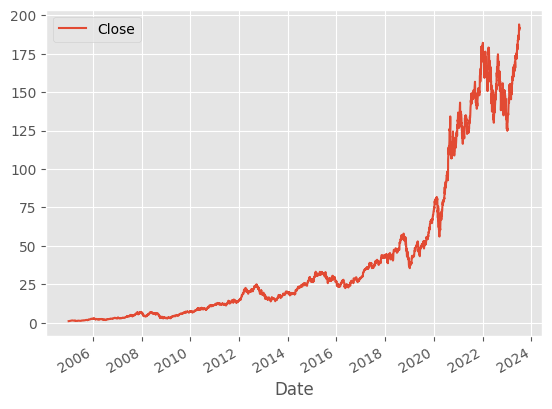

In [83]:
aapl.plot(y='Close')
plt.show()

In [86]:
# making a 100-day moving average, 50-day > 250-day = buy, 50-day < 250-day = sell
aapl['100ma'] = aapl['Close'].rolling(window=100, min_periods=0).mean()
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.960587,691992000,1.130179
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.970453,1096810400,1.135983
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.978952,680433600,1.141250
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.979711,705555200,1.144107
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.051045,2227450400,1.162607


<BarContainer object of 4659 artists>

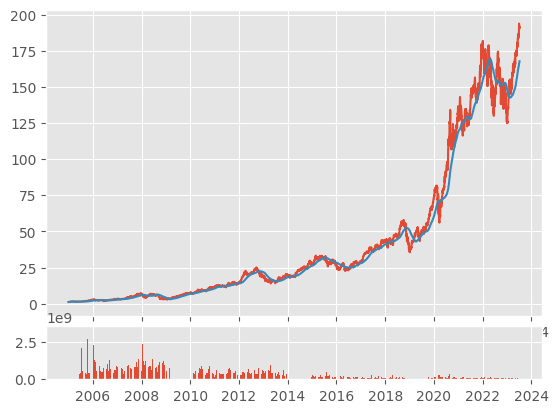

In [87]:
# plotting in matplotlib

# ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
# ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# ax1.plot(aapl.index, aapl['Close'])
# ax1.plot(aapl.index, aapl['100ma'])
# ax2.bar(aapl.index, aapl['Volume'])

In [93]:
# ohlc = open high low close
# volume
# resample data to 10-day chunks

aapl_ohlc = aapl['Close'].resample('10D').ohlc()
aapl_volume = aapl['Volume'].resample('10D').sum()

aapl_ohlc.reset_index(inplace=True)

aapl_ohlc['Date'] = aapl_ohlc['Date'].map(mdates.date2num)

aapl.head()


,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.960587,691992000,1.130179
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.970453,1096810400,1.135983
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.978952,680433600,1.141250
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.979711,705555200,1.144107
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.051045,2227450400,1.162607


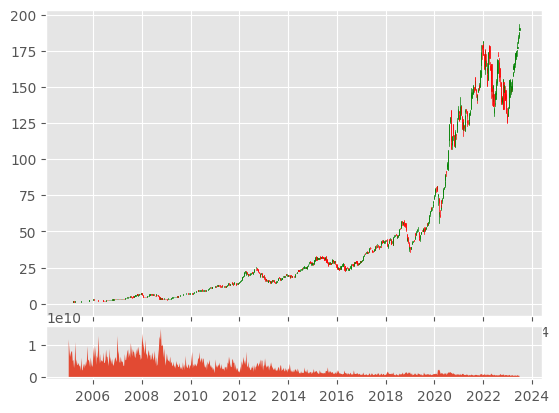

In [98]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()
candlestick_ohlc(ax1, aapl_ohlc.values, width=2, colorup='g')
ax2.fill_between(aapl_volume.index.map(mdates.date2num), aapl_volume.values, 0)
plt.show()